In [1]:
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [2]:
test_path='C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced'
test_d=os.listdir(test_path)
for i in test_d:
   print( i,len(os.listdir(test_path+'/'+i)))

Center 3462
Donut 409
Edge-Loc 2417
Edge-Ring 8554
Loc 1620
Near-Full 54
None 36730
Random 609
Scratch 500


In [3]:
sample_wafer=[]
for i in test_d:
    sample_wafer.append(test_path+'/'+i+'/'+os.listdir(test_path+'/'+i+'/')[0])

['C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Center/center_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Donut/Donut_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Edge-Loc/Edge-loc_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Edge-Ring/Edge-ring_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Loc/Loc_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Near-Full/Near-full_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/None/None_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Random/Random_1.jpg',
 'C://Users//rchilakamarr//Documents//Learnings//TF//WaferMap//imbalanced/Scratch/Scratch_1.jpg']

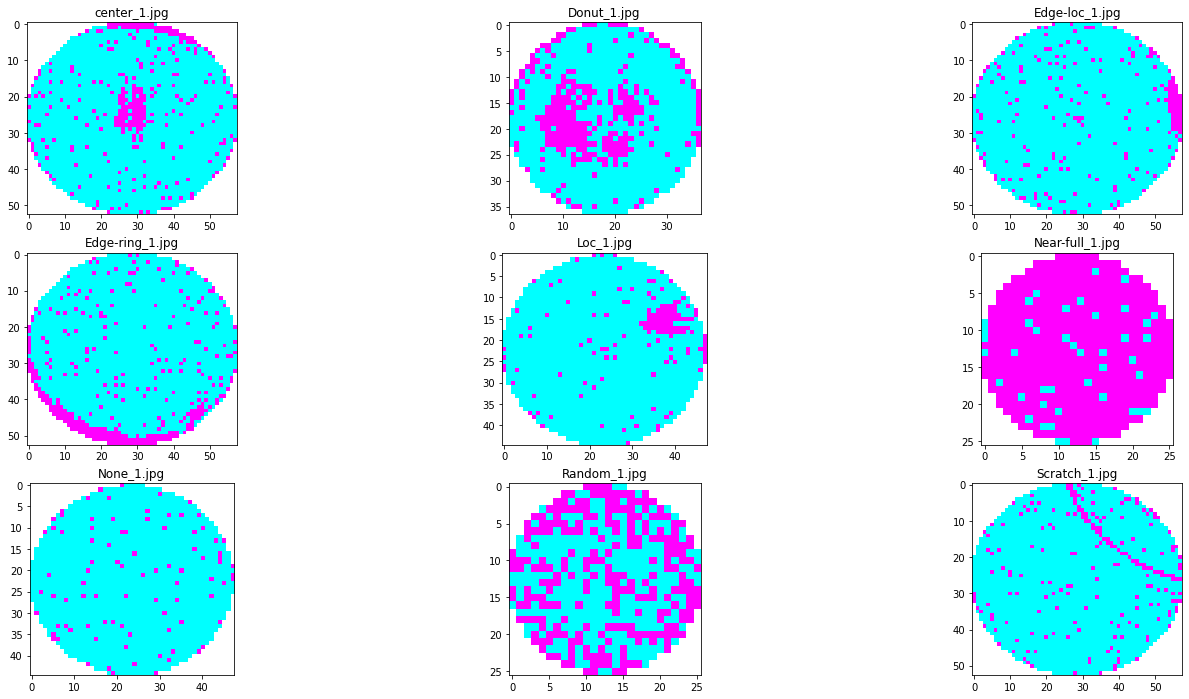

In [4]:
def plot_wafers(rows,cols):
    f, axarr = plt.subplots(rows,cols,figsize=(24,12))
    m=0
    for i in range(rows):
        for j in range(cols):
            axarr[i,j].imshow(imread(sample_wafer[m]))
            axarr[i,j].set_title(os.path.basename(sample_wafer[m])) 
            m+=1

plot_wafers(3,3)

In [5]:
export_dir='C://Users//rchilakamarr//Downloads//to_deploy.h5'
saved_model = load_model(export_dir)


In [6]:
class_indices={'Center': 0,
 'Donut': 1,
 'Edge-loc': 2,
 'Edge-ring': 3,
 'Loc': 4,
 'Near-Full': 5,
 'None': 6,
 'Random': 7,
 'Scratch': 8}

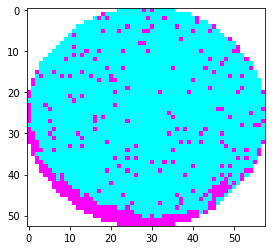

In [7]:
plt.imshow(imread(sample_wafer[3]))

In [8]:

img_shape=(64,65,4)
eval_image = image.load_img(sample_wafer[3],target_size=img_shape,color_mode='rgba')
eval_image = image.img_to_array(eval_image)
eval_image = np.expand_dims(eval_image, axis=0)
pred_list=saved_model.predict(eval_image)
keys=list(class_indices.keys())
print('wafer defect classifed as '+ str(keys[pred_list.argmax()]))

wafer defect classifed as Edge-ring
